In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import ast
def parse_tuple(string):
    try:
        s = ast.literal_eval(str(string))
        if type(s) == tuple:
            return s
        return
    except:
        return

def set_subset(dest, n):
    # Distribute subsets according to the sites (this makes drawing easier)
    nodes = []
    for node in dest.nodes():
        if node != 's' and node != 't':
            nodes.append(parse_tuple(node))
    
    subsetdict = {str((x,i)):{"subset":x} for (x,i) in nodes}
    nx.set_node_attributes(dest,subsetdict)
    dest.nodes['s']['subset'] = -1
    dest.nodes['t']['subset'] = n

def draw_system_graph(graph,ax=None):
    """Draw the connectivity graph for the nsite system.
    This graph is fully connected between the different sites.
    The number of nodes in each layer is given by the number of points in the respective eps-net on the site.

    Args:
        ax (plt.axis, optional): Matplotlib axis to use for drawing. Defaults to None.
    """
    f, axvec = plt.subplots(1,1)
    pos = nx.multipartite_layout(graph)
    labels = nx.get_edge_attributes(graph,'weight')
    new_labels = {}
    for k, v in labels.items():
        new_labels[k] = round(v, 2)

        
    nx.draw_networkx(graph, pos, ax=ax,with_labels=False)
    # nx.draw_networkx_edge_labels(graph, pos, ax=ax,edge_labels=new_labels)

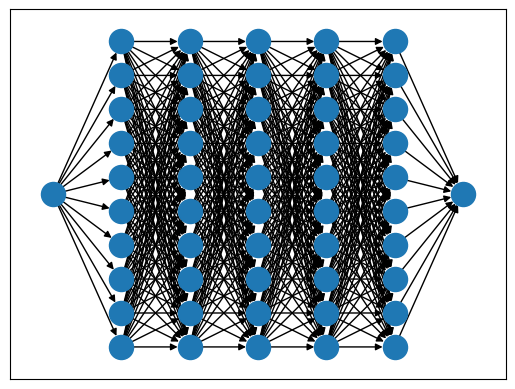

In [5]:
g = nx.read_graphml("ising_nsites_5_npoints_10.gml")
#g.remove_nodes_from(['s', 't'])

draw_system_graph(g)